In [3]:
import skimage.io, skimage.color
import numpy
import matplotlib.pyplot
import HOG

In [5]:
img = skimage.io.imread("/home/an/an_workplace/Lab_CV/Data/ozil.png")
if img.shape[-1] == 4:
    img = img[:, :, :3]
img = skimage.color.rgb2gray(img)

horizontal_mask = numpy.array([-1, 0, 1])
vertical_mask = numpy.array([[-1],
                             [0],
                             [1]])

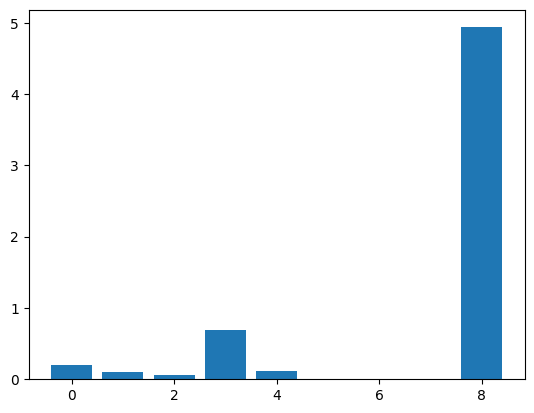

In [6]:
horizontal_gradient = HOG.calculate_gradient(img, horizontal_mask)
vertical_gradient = HOG.calculate_gradient(img, vertical_mask)

grad_magnitude = HOG.gradient_magnitude(horizontal_gradient, vertical_gradient)
grad_direction = HOG.gradient_direction(horizontal_gradient, vertical_gradient)

grad_direction = grad_direction % 180
hist_bins = numpy.array([10,30,50,70,90,110,130,150,170])

# Histogram of the first cell in the first block.
cell_direction = grad_direction[:8, :8]
cell_magnitude = grad_magnitude[:8, :8]
HOG_cell_hist = HOG.HOG_cell_histogram(cell_direction, cell_magnitude, hist_bins)

matplotlib.pyplot.bar(x=numpy.arange(9), height=HOG_cell_hist, align="center", width=0.8)
matplotlib.pyplot.show()